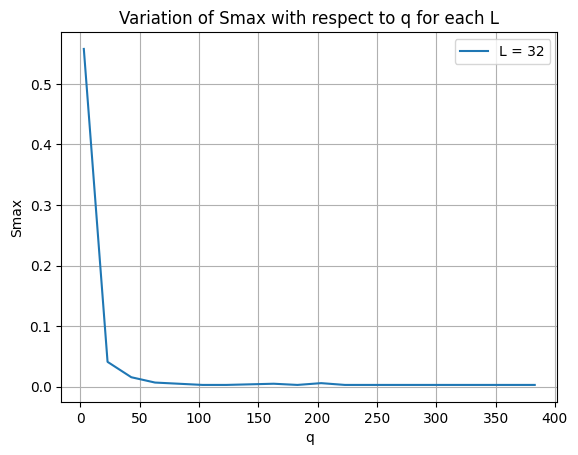

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Parameters
L_values = [32]
F_values = [3]
q = 400

# Initialize the culture grid
def initialize_culture_grid(L, F, q):
    return np.random.randint(q, size=(L, L, F))

# Perform a simulation step
def simulation_step(culture_grid, L, F, q):
    # Randomly select an agent
    x, y = np.random.randint(L, size=2)

    # Randomly select a neighbor
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    nx, ny = (x + dx) % L, (y + dy) % L

    # If they share at least one cultural feature
    shared_features = culture_grid[x, y, :] == culture_grid[nx, ny, :]
    if np.any(shared_features):
        # The agent adopts one differing feature from the neighbor
        differing_features = np.where(~shared_features)[0]
        if differing_features.size > 0:
            f = np.random.choice(differing_features)
            culture_grid[x, y, f] = culture_grid[nx, ny, f]

# Main simulation
Smax_final_dict = {}
q_values = np.arange(3, q + 3, 20)

for L in L_values:
    Smax_final = []

    for F in F_values:
        for n in q_values:
            culture_grid = initialize_culture_grid(L, F, n)
            culture_integers = np.sum(culture_grid * (n ** np.arange(F)), axis=2)
            cmap = colors.ListedColormap(np.random.rand(n**F, 3))

            # Start the simulation
            for _ in range(1000000):
                simulation_step(culture_grid, L, F, q)

            # Re-compute a unique integer for each possible culture
            culture_integers = np.sum(culture_grid * (n ** np.arange(F)), axis=2)

            # Calculate Smax
            unique_vals, counts = np.unique(culture_integers, return_counts=True)
            Smax = np.max(counts)
            Smax_final.append(Smax / (L ** 2))

        Smax_final_dict[L] = Smax_final

# Plotting Smax with respect to q for each L and F
for L, Smax_final in Smax_final_dict.items():
    plt.plot(q_values, Smax_final, label=f"L = {L}")

plt.xlabel('q')
plt.ylabel('Smax')
plt.title('Variation of Smax with respect to q for each L')
plt.legend()
plt.grid(True)
plt.show()
